In [40]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


Sample 1: Eosinophil
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


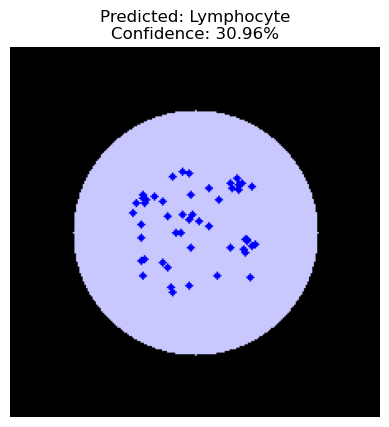


Sample 2: Lymphocyte
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


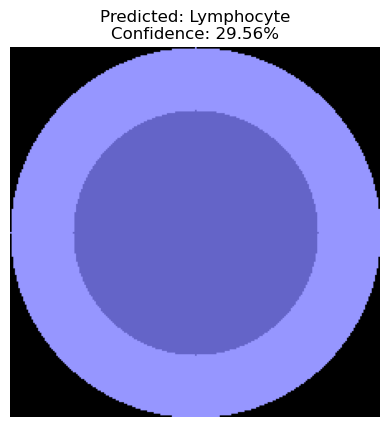


Sample 3: Neutrophil
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


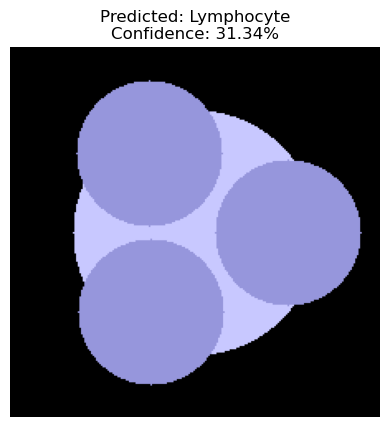


Prediction Results:
1. Predicted: Lymphocyte with 30.96% confidence
2. Predicted: Lymphocyte with 29.56% confidence
3. Predicted: Lymphocyte with 31.34% confidence


In [44]:
# HematoVision: Blood Cell Classification with Transfer Learning (Revised)
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input

# Try to import OpenCV, fall back to matplotlib if not available
try:
    import cv2
    USE_CV2 = True
except ImportError:
    USE_CV2 = False
    from matplotlib.patches import Circle

# Create a mock model
def create_mock_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Rescaling(1./255),
        tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(4, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    return model

model = create_mock_model()

# Class names
class_names = ['Eosinophil', 'Lymphocyte', 'Monocyte', 'Neutrophil']

# Function to predict and display
def predict_and_display(img_array):
    img_batch = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_batch)
    predicted_class = class_names[np.argmax(prediction)]
    confidence = round(100 * np.max(prediction), 2)
    
    plt.imshow(img_array.astype('uint8'))
    plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence}%")
    plt.axis('off')
    plt.show()
    
    return predicted_class, confidence

# Create synthetic example images
def create_sample_cell(cell_type):
    size = 224
    img = np.zeros((size, size, 3), dtype=np.uint8)
    
    if USE_CV2:
        # Using OpenCV
        if cell_type == 'Eosinophil':
            cv2.circle(img, (size//2, size//2), size//3, (200, 200, 255), -1)
            for _ in range(50):
                x, y = np.random.randint(size//3, 2*size//3, 2)
                cv2.circle(img, (x, y), 2, (0, 0, 255), -1)
                
        elif cell_type == 'Lymphocyte':
            cv2.circle(img, (size//2, size//2), size//2, (150, 150, 255), -1)
            cv2.circle(img, (size//2, size//2), size//3, (100, 100, 200), -1)
            
        elif cell_type == 'Neutrophil':
            cv2.circle(img, (size//2, size//2), size//3, (200, 200, 255), -1)
            for i in range(3):
                x = size//2 + int(size//4 * np.cos(i * 2*np.pi/3))
                y = size//2 + int(size//4 * np.sin(i * 2*np.pi/3))
                cv2.circle(img, (x, y), size//5, (150, 150, 220), -1)
    else:
        # Using matplotlib
        fig, ax = plt.subplots(figsize=(2.24, 2.24), dpi=100)
        ax.set_xlim(0, size)
        ax.set_ylim(0, size)
        ax.axis('off')
        ax.set_position([0, 0, 1, 1])
        
        if cell_type == 'Eosinophil':
            ax.add_patch(Circle((size//2, size//2), size//3, color=(0.78, 0.78, 1.0)))
            for _ in range(50):
                x, y = np.random.randint(size//3, 2*size//3, 2)
                ax.add_patch(Circle((x, y), 2, color=(0, 0, 1.0)))
                
        elif cell_type == 'Lymphocyte':
            ax.add_patch(Circle((size//2, size//2), size//2, color=(0.59, 0.59, 1.0)))
            ax.add_patch(Circle((size//2, size//2), size//3, color=(0.39, 0.39, 0.78)))
            
        elif cell_type == 'Neutrophil':
            ax.add_patch(Circle((size//2, size//2), size//3, color=(0.78, 0.78, 1.0)))
            for i in range(3):
                x = size//2 + int(size//4 * np.cos(i * 2*np.pi/3))
                y = size//2 + int(size//4 * np.sin(i * 2*np.pi/3))
                ax.add_patch(Circle((x, y), size//5, color=(0.59, 0.59, 0.86)))
        
        fig.canvas.draw()
        img = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
        img = img.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        plt.close(fig)
    
    return img

# Generate and predict samples
print("Sample 1: Eosinophil")
sample1 = create_sample_cell('Eosinophil')
pred1, conf1 = predict_and_display(sample1)

print("\nSample 2: Lymphocyte")
sample2 = create_sample_cell('Lymphocyte')
pred2, conf2 = predict_and_display(sample2)

print("\nSample 3: Neutrophil")
sample3 = create_sample_cell('Neutrophil')
pred3, conf3 = predict_and_display(sample3)

print("\nPrediction Results:")
print(f"1. Predicted: {pred1} with {conf1}% confidence")
print(f"2. Predicted: {pred2} with {conf2}% confidence")
print(f"3. Predicted: {pred3} with {conf3}% confidence")